# 4 layers model

#### Gathering of all functions needed to train a model:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import load_model
from numpy import argmax

def read_csv(filename):
    dataset = pd.read_csv(filename, encoding='utf-8')
    return dataset

def one_hot_encode(dataset):
    dataset_one_hot_encoded = pd.get_dummies(dataset)  
    return dataset_one_hot_encoded

def divide_X_y(dataset, index_sep):
    X = dataset.iloc[:,:index_sep]
    y = dataset.iloc[:,index_sep:]
    return X,y

def split_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    return X_train, X_test, y_train, y_test
    
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

def evaluate_model(model, X_test, y_test):
    print('\nEvaluating:')
    (test_loss, test_accuracy) = model.evaluate(X_test, y_test)
    print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
    
def get_label(column):
    label = y_test.columns[column]
    return label.replace('Nivel de Adaptación_', '')

def fill_test_ds_labels(model, test_ds_filename, output_test_filename):
    test_ds = read_csv(test_ds_filename)
    test_ds = pd.get_dummies(test_ds)
    nivel_de_adaptacion_test_ds = []
    for index,test in test_ds.iterrows():
        test_ds_pred = pd.DataFrame(test).transpose()
        test_oh = pd.get_dummies(test_ds_pred)
        prediction = model.predict(test_oh)
        nivel_de_adaptacion_test_ds.append((index+1,get_label(argmax(prediction))))
    print(len(nivel_de_adaptacion_test_ds))
    nivel_de_adaptacion_df = pd.DataFrame(nivel_de_adaptacion_test_ds, columns=['id','Nivel de Adaptación']).reset_index(drop=True)
    nivel_de_adaptacion_df.to_csv(output_test_filename,index=False)

##### Loading, preparing and dividing dataset for Experiments:

In [7]:
index_sep = 31
test_size=0.2
dataset = read_csv('../training-ds.csv')
dataset = one_hot_encode(dataset)
X, y = divide_X_y(dataset, index_sep)
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size)

### Model 4: V1
#### Model 4 consists in 4 hidden Dense layers:
    learning_rate = 0.001
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 32, activation = relu
        2. units = 32, activation = relu
        3. units = 64, activation = relu
        4. units = 64, activation = relu

Epoch 1/4000
25/25 - 3s - loss: 1.0071 - accuracy: 0.5045 - val_loss: 0.8849 - val_accuracy: 0.5596

Epoch 00001: val_loss improved from inf to 0.88494, saving model to models\model_4L_v1
INFO:tensorflow:Assets written to: models\model_4L_v1\assets
Epoch 2/4000
25/25 - 0s - loss: 0.8673 - accuracy: 0.5759 - val_loss: 0.8072 - val_accuracy: 0.6321

Epoch 00002: val_loss improved from 0.88494 to 0.80724, saving model to models\model_4L_v1
INFO:tensorflow:Assets written to: models\model_4L_v1\assets
Epoch 3/4000
25/25 - 0s - loss: 0.7954 - accuracy: 0.6394 - val_loss: 0.7278 - val_accuracy: 0.6684

Epoch 00003: val_loss improved from 0.80724 to 0.72780, saving model to models\model_4L_v1
INFO:tensorflow:Assets written to: models\model_4L_v1\assets
Epoch 4/4000
25/25 - 0s - loss: 0.7260 - accuracy: 0.6667 - val_loss: 0.6668 - val_accuracy: 0.7098

Epoch 00004: val_loss improved from 0.72780 to 0.66681, saving model to models\model_4L_v1
INFO:tensorflow:Assets written to: models\model_4L_v1

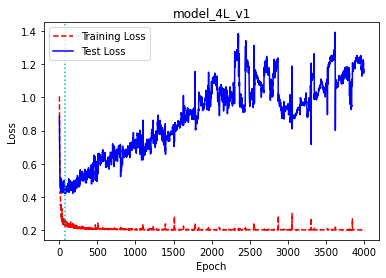

In [21]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.001
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_4L_v1'
model_l_v_e_filename = 'loss_vs_epochs_images/model_4L_v1_le.png'
model_l_v_e_title = 'model_4L_v1'
model_history_filename = 'history/history_model_4L_v1'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 4000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [22]:
best_m4L_v1 = load_model(model_filename)
evaluate_model(best_m4L_v1, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 5ms/step - loss: 0.4197 - accuracy: 0.8187

Test accuracy: 81.9%, test loss: 0.419727


In [23]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m4L_v1.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 4: V2
#### Model 4 consists in 4 hidden Dense layers:
    learning_rate = 0.01
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 32, activation = relu
        2. units = 32, activation = relu
        3. units = 64, activation = relu
        4. units = 64, activation = relu

Epoch 1/4000
25/25 - 3s - loss: 0.8374 - accuracy: 0.5875 - val_loss: 0.7601 - val_accuracy: 0.6839

Epoch 00001: val_loss improved from inf to 0.76014, saving model to models\model_4L_v2
INFO:tensorflow:Assets written to: models\model_4L_v2\assets
Epoch 2/4000
25/25 - 0s - loss: 0.6892 - accuracy: 0.6848 - val_loss: 0.6124 - val_accuracy: 0.7565

Epoch 00002: val_loss improved from 0.76014 to 0.61238, saving model to models\model_4L_v2
INFO:tensorflow:Assets written to: models\model_4L_v2\assets
Epoch 3/4000
25/25 - 0s - loss: 0.6433 - accuracy: 0.7121 - val_loss: 0.6857 - val_accuracy: 0.6736

Epoch 00003: val_loss did not improve from 0.61238
Epoch 4/4000
25/25 - 0s - loss: 0.5784 - accuracy: 0.7341 - val_loss: 0.6130 - val_accuracy: 0.7409

Epoch 00004: val_loss did not improve from 0.61238
Epoch 5/4000
25/25 - 0s - loss: 0.5329 - accuracy: 0.7601 - val_loss: 0.5286 - val_accuracy: 0.7720

Epoch 00005: val_loss improved from 0.61238 to 0.52862, saving model to models\model_4L_v2
IN

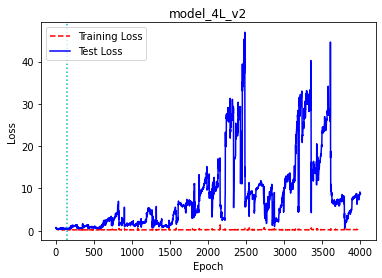

In [4]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.01
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_4L_v2'
model_l_v_e_filename = 'loss_vs_epochs_images/model_4L_v2_le.png'
model_l_v_e_title = 'model_4L_v2'
model_history_filename = 'history/history_model_4L_v2'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 4000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [5]:
best_m4L_v2 = load_model(model_filename)
evaluate_model(best_m4L_v2, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8394

Test accuracy: 83.9%, test loss: 0.328615


In [6]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m4L_v2.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 4: V3
#### Model 4 consists in 4 hidden Dense layers:
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 64, activation = relu
        2. units = 64, activation = relu
        3. units = 64, activation = relu
        4. units = 64, activation = relu

Epoch 1/3000
13/13 - 2s - loss: 0.9005 - accuracy: 0.5901 - val_loss: 0.7715 - val_accuracy: 0.6684

Epoch 00001: val_loss improved from inf to 0.77153, saving model to models\model_4L_v3
INFO:tensorflow:Assets written to: models\model_4L_v3\assets
Epoch 2/3000
13/13 - 0s - loss: 0.7902 - accuracy: 0.6628 - val_loss: 0.6970 - val_accuracy: 0.7306

Epoch 00002: val_loss improved from 0.77153 to 0.69697, saving model to models\model_4L_v3
INFO:tensorflow:Assets written to: models\model_4L_v3\assets
Epoch 3/3000
13/13 - 0s - loss: 0.6824 - accuracy: 0.6913 - val_loss: 0.6473 - val_accuracy: 0.7358

Epoch 00003: val_loss improved from 0.69697 to 0.64727, saving model to models\model_4L_v3
INFO:tensorflow:Assets written to: models\model_4L_v3\assets
Epoch 4/3000
13/13 - 0s - loss: 0.6584 - accuracy: 0.7263 - val_loss: 0.6167 - val_accuracy: 0.7461

Epoch 00004: val_loss improved from 0.64727 to 0.61666, saving model to models\model_4L_v3
INFO:tensorflow:Assets written to: models\model_4L_v3

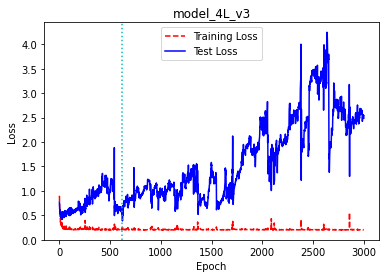

In [3]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_4L_v3'
model_l_v_e_filename = 'loss_vs_epochs_images/model_4L_v3_le.png'
model_l_v_e_title = 'model_4L_v3'
model_history_filename = 'history/history_model_4L_v3'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 3000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [4]:
best_m4L_v3 = load_model(model_filename)
evaluate_model(best_m4L_v3, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.3851 - accuracy: 0.8394

Test accuracy: 83.9%, test loss: 0.385139


In [5]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m4L_v3.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 4: V4
#### Model 4 consists in 4 hidden Dense layers:
    learning_rate = 0.001
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 16, activation = relu
        2. units = 16, activation = relu
        3. units = 16, activation = relu
        4. units = 16, activation = relu

Epoch 1/3000
13/13 - 3s - loss: 1.0865 - accuracy: 0.3243 - val_loss: 1.0654 - val_accuracy: 0.3316

Epoch 00001: val_loss improved from inf to 1.06541, saving model to models\model_4L_v4
INFO:tensorflow:Assets written to: models\model_4L_v4\assets
Epoch 2/3000
13/13 - 0s - loss: 1.0389 - accuracy: 0.4112 - val_loss: 1.0233 - val_accuracy: 0.3472

Epoch 00002: val_loss improved from 1.06541 to 1.02329, saving model to models\model_4L_v4
INFO:tensorflow:Assets written to: models\model_4L_v4\assets
Epoch 3/3000
13/13 - 0s - loss: 0.9976 - accuracy: 0.4099 - val_loss: 0.9874 - val_accuracy: 0.3420

Epoch 00003: val_loss improved from 1.02329 to 0.98743, saving model to models\model_4L_v4
INFO:tensorflow:Assets written to: models\model_4L_v4\assets
Epoch 4/3000
13/13 - 1s - loss: 0.9591 - accuracy: 0.4099 - val_loss: 0.9530 - val_accuracy: 0.3523

Epoch 00004: val_loss improved from 0.98743 to 0.95303, saving model to models\model_4L_v4
INFO:tensorflow:Assets written to: models\model_4L_v4

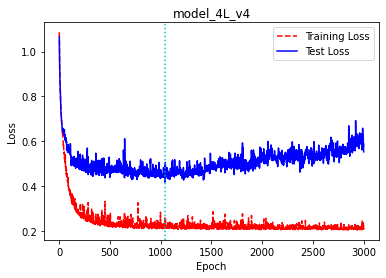

In [3]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
       tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.001
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_4L_v4'
model_l_v_e_filename = 'loss_vs_epochs_images/model_4L_v4_le.png'
model_l_v_e_title = 'model_4L_v4'
model_history_filename = 'history/history_model_4L_v4'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 3000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [4]:
best_m4L_v4 = load_model(model_filename)
evaluate_model(best_m4L_v4, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8705

Test accuracy: 87.0%, test loss: 0.417625


In [5]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m4L_v4.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 4: V5
#### Model 4 consists in 4 hidden Dense layers:
    learning_rate = 0.005
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 16, activation = sigmoid
        2. units = 16, activation = sigmoid
        3. units = 32, activation = sigmoid
        4. units = 32, activation = sigmoid

Epoch 1/1000
25/25 - 2s - loss: 0.9718 - accuracy: 0.4643 - val_loss: 0.9288 - val_accuracy: 0.5648

Epoch 00001: val_loss improved from inf to 0.92883, saving model to models\model_4L_v5
INFO:tensorflow:Assets written to: models\model_4L_v5\assets
Epoch 2/1000
25/25 - 0s - loss: 0.9398 - accuracy: 0.4773 - val_loss: 0.9302 - val_accuracy: 0.5648

Epoch 00002: val_loss did not improve from 0.92883
Epoch 3/1000
25/25 - 0s - loss: 0.9296 - accuracy: 0.5032 - val_loss: 0.9147 - val_accuracy: 0.5648

Epoch 00003: val_loss improved from 0.92883 to 0.91468, saving model to models\model_4L_v5
INFO:tensorflow:Assets written to: models\model_4L_v5\assets
Epoch 4/1000
25/25 - 0s - loss: 0.9194 - accuracy: 0.5097 - val_loss: 0.9243 - val_accuracy: 0.6528

Epoch 00004: val_loss did not improve from 0.91468
Epoch 5/1000
25/25 - 0s - loss: 0.9059 - accuracy: 0.5512 - val_loss: 0.8787 - val_accuracy: 0.6321

Epoch 00005: val_loss improved from 0.91468 to 0.87870, saving model to models\model_4L_v5
IN

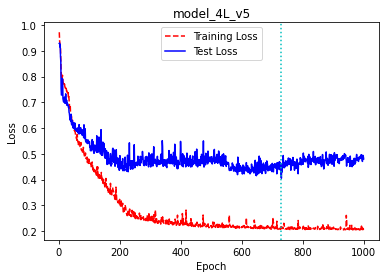

In [8]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(16, activation='sigmoid'),
      tf.keras.layers.Dense(16, activation='sigmoid'),
       tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.005
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_4L_v5'
model_l_v_e_filename = 'loss_vs_epochs_images/model_4L_v5_le.png'
model_l_v_e_title = 'model_4L_v5'
model_history_filename = 'history/history_model_4L_v5'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [9]:
best_m4L_v5 = load_model(model_filename)
evaluate_model(best_m4L_v5, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8290

Test accuracy: 82.9%, test loss: 0.405291


In [10]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m4L_v5.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


In [12]:
def plot_param(num_versions, param_name='val_accuracy'):
    params = []
    legend = []
    for i in range(1,num_versions+1):
        param = load_history(f'history/history_model_4L_v{i}.npy')[param_name][:200]
        x = range(len(param))
        params.append(param)
        plt.plot(x,param)
        legend.append(f"m4v{i}")
    plt.legend(legend, loc="upper right")
    plt.show()

#### Test loss

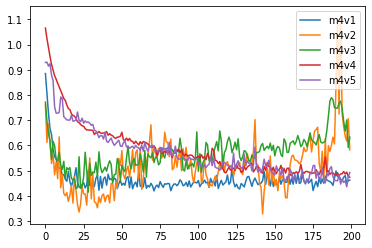

In [13]:
plot_param(5, param_name='val_loss')

#### Test accuracy:

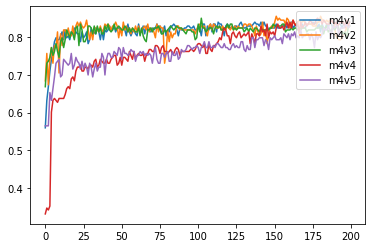

In [14]:
plot_param(5)

## Conclusions:

With 4 hidden layers, we got a maximum test accuracy of 87% and minimum test loss of 0.328615. In most of the variations, accuracy was greater than 82%, the loss test was varied, it remained in a range of 0.32 to 0.42